# Exercise 1. Predict delivery time using sorting time

In [73]:
import pandas as pd
import numpy as np
df_deltime=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 4 Simple Linear Regression/delivery_time.csv')
df_deltime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [74]:
df_deltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [75]:
df_deltime.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [76]:
#no missing values in dataset

In [77]:
df_deltime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [78]:
#rename variables
df_deltime=df_deltime.rename({'Sorting Time': 'ST'}, axis=1)
df_deltime=df_deltime.rename({'Delivery Time': 'DT'}, axis=1)
df_deltime

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

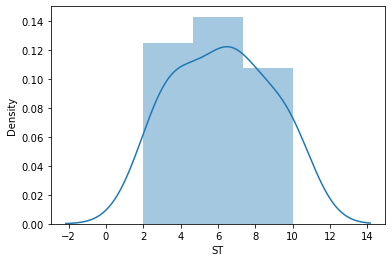

In [79]:
import seaborn as sns
sns.distplot(df_deltime.ST)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST'>

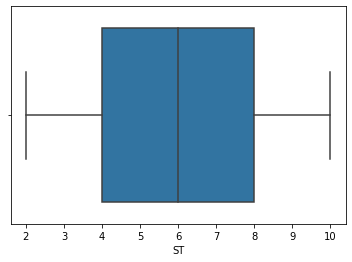

In [80]:
sns.boxplot(df_deltime.ST)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

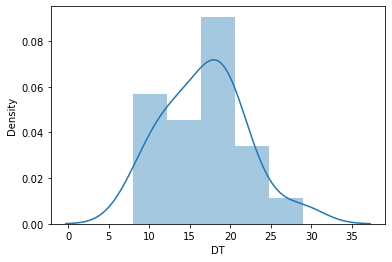

In [81]:
sns.distplot(df_deltime.DT)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DT'>

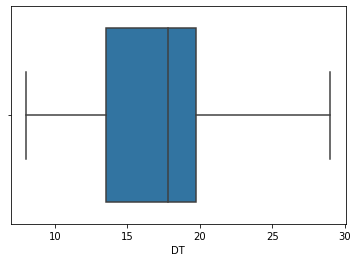

In [82]:
sns.boxplot(df_deltime.DT)

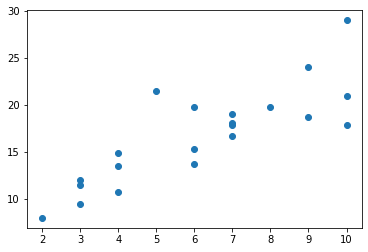

In [83]:
import matplotlib.pyplot as plt
plt.scatter(x='ST',y='DT',data=df_deltime)
plt.show()

In [84]:
#data is linear data

In [85]:
df_deltime[df_deltime.duplicated()]

,DT,ST


In [86]:
#no duplicated data

In [87]:
df_deltime.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [88]:
#strong correlation between variables

In [89]:
import statsmodels.formula.api as smf
del_model=smf.ols('DT~ST',data=df_deltime).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

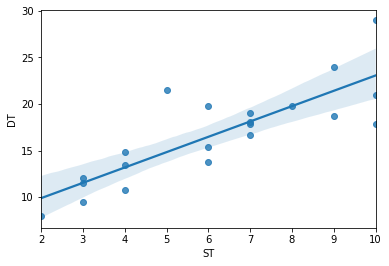

In [90]:
sns.regplot(x='ST',y='DT',data=df_deltime)

In [91]:
del_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [92]:
#for every unit increase in sorting time, there is 1.649 times increase in the delivery time

In [93]:
del_model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [94]:
# H0: Sorting time not significant be used to predict the delivery time
# H1: Sorting time is significant enough to predict the delivery time

# if p value> 0.05, there is a greater than 5% chance that the null hypothesis is true
# since p value<0.05, reject the null hypothesis ; sorting time can be used to predict the delivery time

In [95]:
del_model.rsquared

0.6822714748417231

In [96]:
#as the rsquared value is not very high, the model is not sufficient to predict delivery times using sorting times

In [97]:
del_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        23:04:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#check accuracy of the model
#for a sorting time of 8 mins, delivery time is
print((1.649*8)+6.587)

19.779


In [99]:
df_pred=pd.DataFrame(pd.Series([8,6,12]),columns=['ST'])
df_pred

,ST
0,8
1,6
2,12


In [100]:
del_model.predict(df_pred)

0    19.774893
1    16.476853
2    26.370973
dtype: float64

In [101]:
df_deltime['Predictedvalues']=del_model.fittedvalues
df_deltime['Errors']=del_model.resid
df_deltime


,DT,ST,Predictedvalues,Errors
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [102]:
df_pred['Predicted_DT']=del_model.predict(df_pred)
df_pred

,ST,Predicted_DT
0,8,19.774893
1,6,16.476853
2,12,26.370973


# Exercise 2 Prediction model for salary hike

In [105]:
df_salary=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 4 Simple Linear Regression/Salary_Data.csv')
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [106]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [107]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [108]:
#no missing data

In [109]:
df_salary[df_salary.duplicated()]

,YearsExperience,Salary


In [110]:
#no duplicated data

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

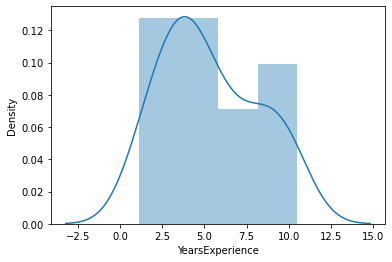

In [111]:
sns.distplot(df_salary.YearsExperience)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

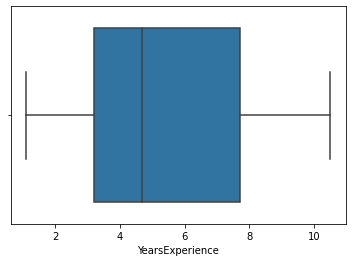

In [112]:
sns.boxplot(df_salary.YearsExperience)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

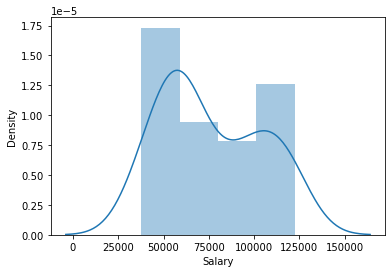

In [113]:
sns.distplot(df_salary.Salary)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

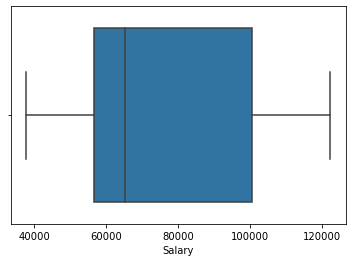

In [114]:
sns.boxplot(df_salary.Salary)

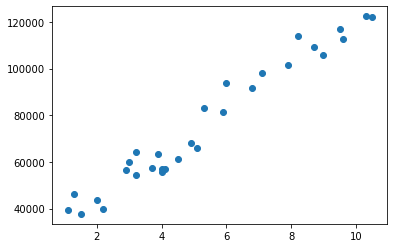

In [115]:
plt.scatter(x='YearsExperience',y='Salary',data=df_salary)
plt.show()

In [116]:
#linear data

In [117]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [118]:
sal_model=smf.ols('Salary~YearsExperience',data=df_salary).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

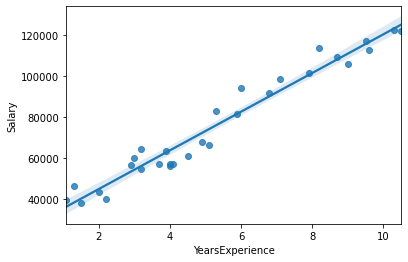

In [119]:
sns.regplot(x='YearsExperience',y='Salary',data=df_salary)

In [120]:
sal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [121]:
#for every unit increase in YearsExperiance, there will be 9449.9 times increase in salary

In [122]:
sal_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [123]:
#H0: YearsExperiance is not significant to predict salary
#H1: YearsExperience is significant to predict salary
#if p>0.05, there will be greater than 5% chance that the null hypothesis is true
#As the pvalue< 0.05, reject null hypothesis; YearsExperience is significant to predict salary

In [124]:
sal_model.rsquared

0.9569566641435086

In [125]:
#YearsExperience is suffiicent to predict salary

In [126]:
sal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        23:08:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#check accuracy of the model
# A person with 5 YearsExperience will have salary of
print((9449.9623*5)+25792.200199)

73042.011699


In [128]:
df_pred_sal=pd.DataFrame(pd.Series([5,10,12]),columns=['YearsExperience'])
df_pred_sal

,YearsExperience
0,5
1,10
2,12


In [129]:
sal_pred=sal_model.predict(df_pred_sal)
sal_pred

0     73042.011806
1    120291.823413
2    139191.748056
dtype: float64

In [130]:
df_salary['Predicted']=sal_model.fittedvalues
df_salary['Errors']=sal_model.resid
df_salary

,YearsExperience,Salary,Predicted,Errors
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


In [131]:
df_pred_sal['Predicted_Salary']=sal_model.predict(df_pred_sal)
df_pred_sal

,YearsExperience,Predicted_Salary
0,5,73042.011806
1,10,120291.823413
2,12,139191.748056
